In [1]:
import pandas as pd

X = pd.read_csv("preprocessed_apartment_rentals.csv")

C:\Users\User\AppData\Local\Temp\ipykernel_561472\1528328078.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  X = pd.read_csv("preprocessed_apartment_rentals.csv")


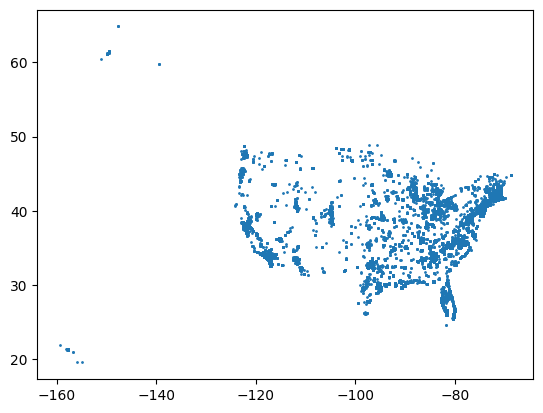

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X["longitude"], X["latitude"], s=1)

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


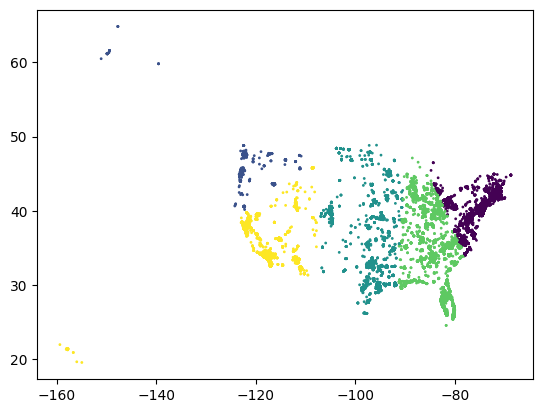

In [3]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=5)
kmeans.fit(X[["longitude", "latitude"]])
X["cluster"] = kmeans.labels_
plt.scatter(X["longitude"], X["latitude"], c=X["cluster"], s=1)